In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = ("Resources/Mouse_metadata.csv")
study_results_path =( "Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice =len(data_complete ["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
dup = data_complete[data_complete.duplicated(["Mouse ID","Timepoint"])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = data_complete.set_index('Mouse ID')
mouse= mouse_dup.loc['g989',:]
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_dup.drop(index='g989')
comb_data= clean_df.reset_index()
clean_df_table= pd.DataFrame(comb_data)
clean_df_table.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data =len(comb_data["Mouse ID"].unique())
clean_data

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor=comb_data["Tumor Volume (mm3)"]
mean_T =  np.mean(tumor) 
median_T = np.median(tumor)
variance_T = np. var(tumor,ddof =0)
standard_T = np.std(tumor, ddof =0)

summary_statistics_table =pd.DataFrame({"Mean of tumor volume": [mean_T],
                                        "Median of tumor Volume":[median_T], 
                                        "Variance of tumor volume":[variance_T],
                                        "Standard deviation of tumor volume":[standard_T]})
summary_statistics_table


,Mean of tumor volume,Median of tumor Volume,Variance of tumor volume,Standard deviation of tumor volume
0,50.435293,48.933454,79.42064,8.911826


<Axes: xlabel='Drug Regimen'>

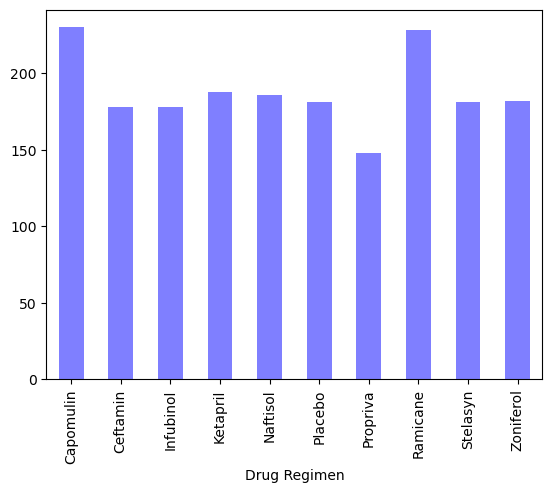

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
comb_data.groupby("Drug Regimen").count().plot(kind='bar',color= 'blue', legend=False,alpha=0.5, align="center")

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen